In [1]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier

from sklearn.pipeline import Pipeline
import spacy
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.metrics import classification_report, confusion_matrix

import pandas as pd
from sklearn.model_selection import train_test_split
from proj_helper import Helper, TimeHelper
import joblib

1 - General Greeting	Used Hi for all injection words (Hey, Hi,..) <br>
2 - Greeting + Checkback	Replaced usergreetings -> Good Morning <br>
3 - Ask Available Services	Eg:- All available services <br>
4 - Ask General Services	Eg :- Hair cut, Colouring … <br> 
5 - Make Reservation	<br>
6 - Change Reservation	<br>
7 - Remove/Cancel Reservation	<br>
8 - 8 - Close Chat / Close greeting <br>

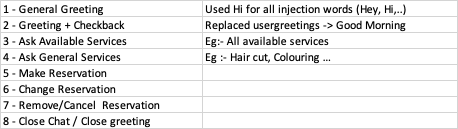


In [2]:
chat_data = pd.read_excel('UserChatData.xlsx', header=0) 

In [3]:
chat_data.head()

,Chat,Group
0,interjection,1
1,interjection I am username,1
2,interjection I'm username,1
3,interjection Glad to meet you!,1
4,interjection Nice to meet you!,1


In [4]:
chat_data['Group'].value_counts()

4    90
3    90
5    67
6    66
1    66
7    60
2    60
8    55
Name: Group, dtype: int64

In [5]:
item = Helper()
# item.preprocess("Heyy I'm Mudith")

for row in range(len(chat_data['Chat'])):
    chat_data['Chat'][row] = item.preprocess_givendata(chat_data['Chat'][row])

chat_data['Chat']

<ipython-input-5-659158dd99a6>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chat_data['Chat'][row] = item.preprocess_givendata(chat_data['Chat'][row])


0                                       interjection
1                         interjection I am username
2                         interjection I 'm username
3                      interjection Glad to meet you
4                      interjection Nice to meet you
                           ...                      
549                    I will check and let you know
550                  I 'll check and get back to you
551                 I need to check and let you know
552    I will check with my boss and get back to you
553               Need to check and inform you later
Name: Chat, Length: 554, dtype: object

In [6]:
shuffle_df = chat_data.sample(n=len(chat_data), random_state=12)
x_train,x_test,y_train,y_test=train_test_split(shuffle_df['Chat'],shuffle_df['Group'],test_size=0.25,random_state =12)

In [7]:
# pipe = Pipeline([('Count_Vect',CountVectorizer()),
#                  ('tfidf', TfidfTransformer()),
#                  ('MNB', MultinomialNB(alpha=0.1))])

# pipe = Pipeline([('Count_Vect',CountVectorizer()),
#                  ('tfidf', TfidfTransformer()),
#                  ('SGD', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=12, max_iter=5, tol=None))])

pipe = Pipeline([('Count_Vect',CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('LR', LogisticRegression(penalty='l1', n_jobs=1, C=1e5, solver='saga', max_iter=250, random_state=12))])

pipe.fit(x_train, y_train)
y_pred = pipe.predict(x_test)
y_true = y_test

print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           1       1.00      0.94      0.97        18
           2       0.93      1.00      0.97        14
           3       0.88      0.96      0.92        23
           4       0.96      0.92      0.94        24
           5       0.94      0.89      0.92        19
           6       1.00      1.00      1.00        12
           7       1.00      1.00      1.00        16
           8       1.00      1.00      1.00        13

    accuracy                           0.96       139
   macro avg       0.96      0.96      0.96       139
weighted avg       0.96      0.96      0.96       139



/Users/Chathuranga/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


In [8]:
confusion_matrix(y_true, y_pred,labels=[1, 2, 3, 4, 5, 6, 7, 8])

array([[17,  1,  0,  0,  0,  0,  0,  0],
       [ 0, 14,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 22,  1,  0,  0,  0,  0],
       [ 0,  0,  1, 22,  1,  0,  0,  0],
       [ 0,  0,  2,  0, 17,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 12,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 16,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 13]])

In [9]:
# save the model to disk
filename = 'Group_model.sav'
joblib.dump(pipe, filename)

['Group_model.sav']

In [10]:
# load the model from disk
# loaded_model = joblib.load("Group_model.sav")

In [11]:
item.preprocess("Hi There")

'Hi There'

In [12]:
# loaded_model.predict([item.preprocess("Hi There")])
# print(x_test)

In [13]:
item.preprocess_givendata("Hi I'm Mudith. Good Morning. I need to know about hair cut and coloring. Reservation for Lalith")

"interjection i 'm username . usergreet . i need to know about hair gservice and gservice . reservation for lalith"

In [14]:
item.check_client_name("Yes it's for Lalith")

In [15]:
d = {'chat': x_test, 'actual': y_test, 'pred': y_pred}
len(y_train)
df = pd.DataFrame(data=d)
df[90:]

,chat,actual,pred
448,usergreet How could I cancel appointment,7,7
332,Could you make appointment,5,5
164,interjection I am username . I need to know ab...,3,3
393,I need to change reservation for gservice,6,6
349,I want to get gservice,5,5
237,I like to know about gservice,4,4
187,What do you provide for ladies,3,3
330,usergreet could you interjection give me appoi...,5,3
407,I need to make a change to appointment time,6,6
335,I need to have gservice,5,5


In [16]:
pipe_data = pipe.steps[2][1]

In [17]:
coefs = np.abs(pipe_data.coef_[0])
indices = np.argsort(coefs)[::-1]
feature_set = pipe.steps[0][1].get_feature_names()

In [18]:
impordf = pd.DataFrame({'Word' : feature_set,'Importance' : coefs})
impordf = impordf.sort_values(['Importance', 'Word'], ascending=[0, 1])
impordf.head(20)

,Word,Importance
75,meet,10.179199
64,it,8.968542
62,interjection,8.253275
9,are,6.977786
55,hola,6.556372
139,yo,6.554660
110,some,6.489199
124,usergreet,6.455576
37,fine,6.391500
57,how,5.777555


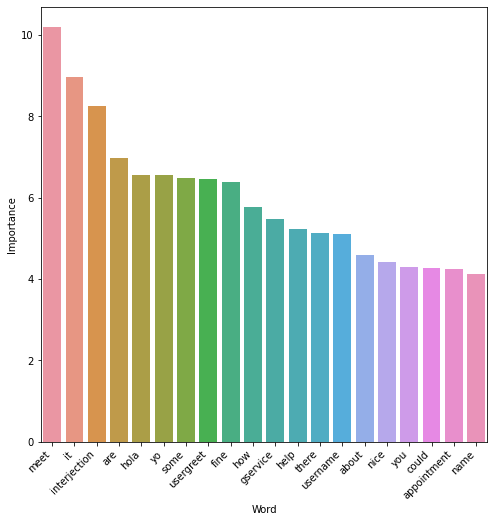

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

fig_dims = (8, 8)
fig, ax = plt.subplots(figsize=fig_dims)
# plt.ylabel('Importance')
sns.barplot(x = "Word",
            y = "Importance", 
            data=impordf.head(20))
plt.xticks(rotation=45, ha='right')
# ax.set(ylabel='Importance')
plt.show()